# Machine Learning Review I

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

## Introducing Scikit-Learn

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


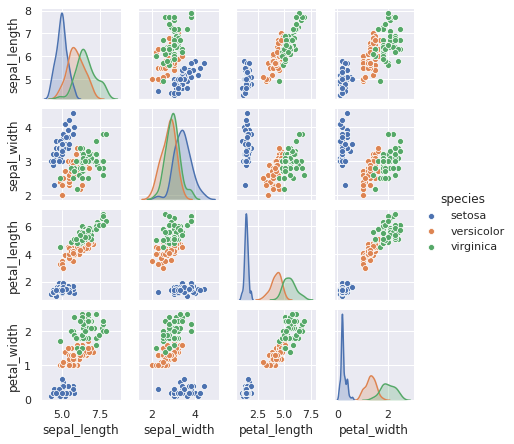

In [3]:
sns.pairplot(iris, hue='species', size=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

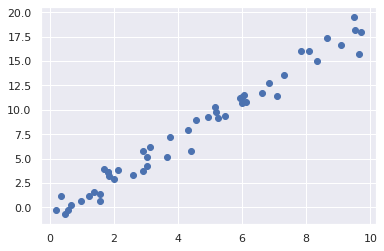

In [6]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [8]:
model.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
x_test = np.linspace(x.min(), x.max(), 100)
y_pred = model.predict(x_test.reshape(-1, 1))

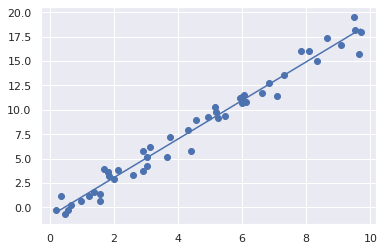

In [10]:
plt.scatter(x, y)
plt.plot(x_test, y_pred)

In [0]:
from sklearn.naive_bayes import GaussianNB
gauss_clf = GaussianNB()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [14]:
gauss_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = gauss_clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, y_pred)

1.0

#### Unsupervised Learning: Dimensionality Reduction

In [0]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)

In [0]:
X_2D = model.fit_transform(X_iris)

In [20]:
X_2D.shape

(150, 2)

---

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [0]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression(**kwargs)
    )

In [0]:
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1.0 / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [0]:
X, y = make_data(40)

In [25]:
X_test = np.linspace(-0.1, 1.1, 500)
print(X_test.shape)
X_test = X_test[:, None]
print(X_test.shape)

(500,)
(500, 1)


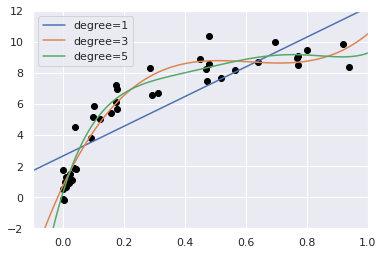

In [26]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [0]:
from sklearn.model_selection import validation_curve

In [0]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

In [29]:
train_score.shape

(21, 7)

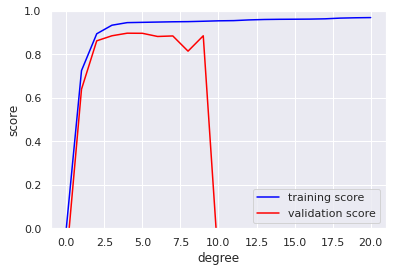

In [30]:
plt.plot(degree, np.mean(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.mean(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

In [31]:
np.argmax(np.mean(val_score, axis=1))

4

In [32]:
degree[np.argmax(np.mean(val_score, axis=1))]

4

### Learning Curves

In [33]:
X2, y2 = make_data(200)
print(X2.shape)
print(y2.shape)

(200, 1)
(200,)


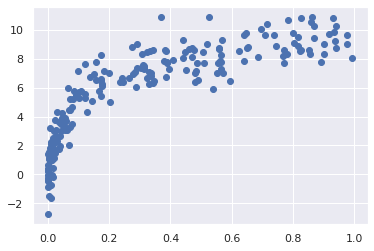

In [35]:
plt.scatter(X2.ravel(), y2);

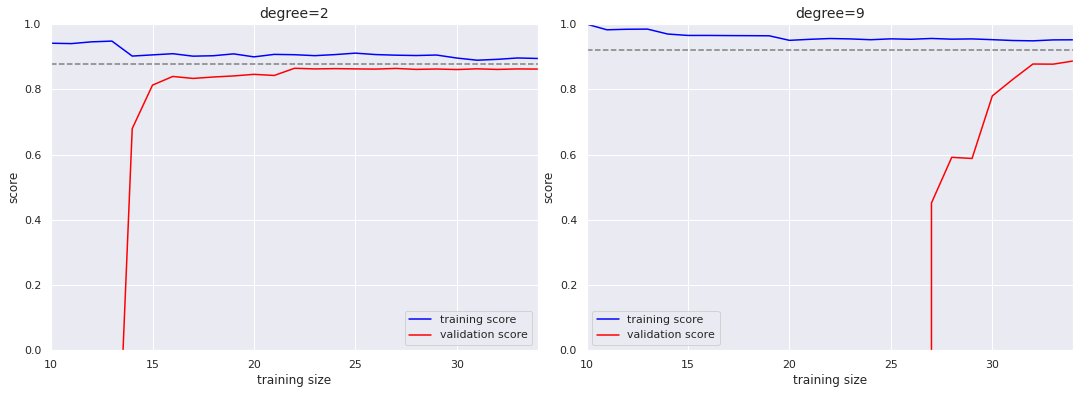

In [36]:
from sklearn.model_selection import learning_curve 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), 
                                         X, y, cv=7, 
                                         train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
                 linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree), size=14)
    ax[i].legend(loc='best')